In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# load griddata
#gd = xr.load_dataset(f'data/griddata_for_micrositing.nc')
gd = xr.load_dataset(f'data/griddata_for_micrositing_with_wind_map.nc')
gd

xbnd = gd['x_bound']
ybnd = gd['y_bound']

In [5]:
gd['u_aligned']

<xarray.DataArray 'u_aligned' (ycell: 1000, xcell: 1000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xcell    (xcell) float64 -2.111e+06 -2.111e+06 ... -2.101e+06 -2.101e+06
  * ycell    (ycell) float64 1.007e+04 1.008e+04 ... 2.004e+04 2.005e+04
Attributes:
    description:  local wind component aligned with mean wind direction
    units:        m/s

In [3]:
delta_y = ybnd.max() - ybnd.min()
mid_y = delta_y / 2 + ybnd.min()
delta_x = xbnd.max() - xbnd.min()
mid_x = delta_x / 2 + xbnd.min()
cropped_gd = gd.sel(
    xnode=slice(mid_x - delta_y / 2, mid_x + delta_y / 2),
    ynode=slice(ybnd.min(),ybnd.max())
)
cropped_gd = cropped_gd.sel(
    xcell=slice(mid_x - delta_y / 2, mid_x + delta_y / 2),
    ycell=slice(ybnd.min(),ybnd.max())
)

cropped_gd

<xarray.Dataset>
Dimensions:        (ynode: 266, xnode: 266, ycell: 266, xcell: 266,
                    bounding_box: 5)
Coordinates:
  * xnode          (xnode) float64 -2.108e+06 -2.108e+06 ... -2.105e+06
  * ynode          (ynode) float64 1.378e+04 1.379e+04 ... 1.642e+04 1.643e+04
  * xcell          (xcell) float64 -2.108e+06 -2.108e+06 ... -2.105e+06
  * ycell          (ycell) float64 1.379e+04 1.38e+04 ... 1.642e+04 1.643e+04
Dimensions without coordinates: bounding_box
Data variables: (12/17)
    xg             (ynode, xnode) float64 -2.108e+06 -2.108e+06 ... -2.105e+06
    yg             (ynode, xnode) float64 1.378e+04 1.378e+04 ... 1.643e+04
    xcc            (ycell, xcell) float64 -2.108e+06 -2.108e+06 ... -2.105e+06
    ycc            (ycell, xcell) float64 1.379e+04 1.379e+04 ... 1.643e+04
    pres           (ycell, xcell) float64 27.49 27.01 26.67 ... 53.33 46.69
    elev           (ycell, xcell) float32 542.0 539.2 536.3 ... 242.7 242.9
    ...             ...
    u              (ycell, xcell) float64 13.49 13.42 13.3 ... 6.071 6.145 6.145
    v              (ycell, xcell) float64 5.845 5.824 5.788 ... 3.722 3.722
    w              (ycell, xcell) float64 -0.8813 -0.9363 -1.038 ... 1.298 1.298
    hvel_mag       (ycell, xcell) float64 14.7 14.63 14.5 ... 7.109 7.185 7.185
    wind_dir       (ycell, xcell) float64 246.6 246.5 246.5 ... 238.8 238.8
    u_aligned      (ycell, xcell) float64 14.7 14.63 14.5 ... 7.024 7.102 7.102
Attributes:
    coordinate_system:  ESRI:102008

In [4]:
cropped_gd['u_aligned']

<xarray.DataArray 'u_aligned' (ycell: 266, xcell: 266)>
array([[14.70066965, 14.6288365 , 14.49813924, ...,  7.82426306,
         7.89079306,  7.89308968],
       [14.74435376, 14.66297934, 14.49129591, ...,  7.99076206,
         8.05702784,  8.05702784],
       [14.74452378, 14.66560276, 14.49257515, ...,  7.99743358,
         8.05702784,  8.05702784],
       ...,
       [ 9.75864366,  9.72154601,  9.58123528, ...,  7.01768971,
         7.10223829,  7.10223829],
       [ 9.74040876,  9.67936477,  9.54860772, ...,  7.01823522,
         7.10217257,  7.10217559],
       [ 9.6633038 ,  9.61597504,  9.45392992, ...,  7.02433539,
         7.10189948,  7.10190167]])
Coordinates:
  * xcell    (xcell) float64 -2.108e+06 -2.108e+06 ... -2.105e+06 -2.105e+06
  * ycell    (ycell) float64 1.379e+04 1.38e+04 ... 1.642e+04 1.643e+04
Attributes:
    description:  local wind component aligned with mean wind direction
    units:        m/s

In [7]:
np.save('het_wind', cropped_gd['u_aligned'])
np.save('cell_x', cropped_gd['xcell'])
np.save('cell_y', cropped_gd['ycell'])

In [5]:
# xbnd = gd['x_bound']
# ybnd = gd['y_bound']
eagle_presence_in_opt_region = gd['pres'].where(gd['in_opt_region'])
eagle_presence_in_opt_region_cropped = cropped_gd['pres'].where(cropped_gd['in_opt_region'])

terrain_in_opt_region = gd['elev'].where(gd['in_opt_region'])
terrain_in_opt_region.min(), terrain_in_opt_region.max()

NameError: name 'cropped_gd' is not defined

In [33]:
np.save('new_eagle_data_cropped', np.nan_to_num(eagle_presence_in_opt_region_cropped))
# np.max(eagle_presence_in_opt_region)

(13780.746876463994, 16437.568000164687)

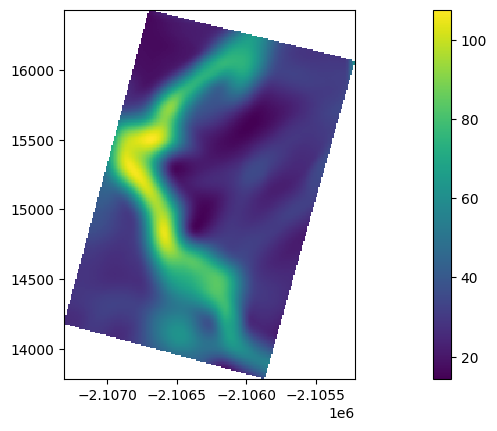

In [4]:
plt.pcolormesh(gd['xg'],gd['yg'],
               eagle_presence_in_opt_region)
plt.colorbar()
plt.axis('scaled') # do this before setting axes lim
plt.xlim((xbnd.min(),xbnd.max()))
plt.ylim((ybnd.min(),ybnd.max()))

(13780.746876463994, 16437.568000164687)

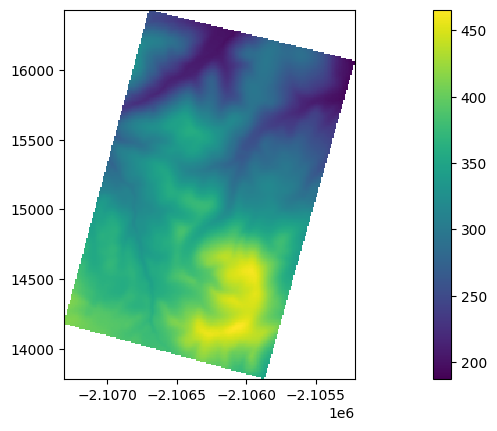

In [5]:
plt.pcolormesh(gd['xg'],gd['yg'],
               terrain_in_opt_region)
plt.colorbar()
plt.axis('scaled') # do this before setting axes lim
plt.xlim((xbnd.min(),xbnd.max()))
plt.ylim((ybnd.min(),ybnd.max()))

In [19]:
print(xbnd.min()-xbnd.max())
print(ybnd.min()-ybnd.max())
print(xbnd.min(), xbnd.max())
print(ybnd.min(), ybnd.max())

<xarray.DataArray 'x_bound' ()>
array(-2094.36245926)
<xarray.DataArray 'y_bound' ()>
array(-2656.8211237)
<xarray.DataArray 'x_bound' ()>
array(-2107312.92248974) <xarray.DataArray 'x_bound' ()>
array(-2105218.56003048)
<xarray.DataArray 'y_bound' ()>
array(13780.74687646) <xarray.DataArray 'y_bound' ()>
array(16437.56800016)


(-2111271.386648003,
 -2101291.3766480032,
 10066.272326076236,
 20056.272326076236)

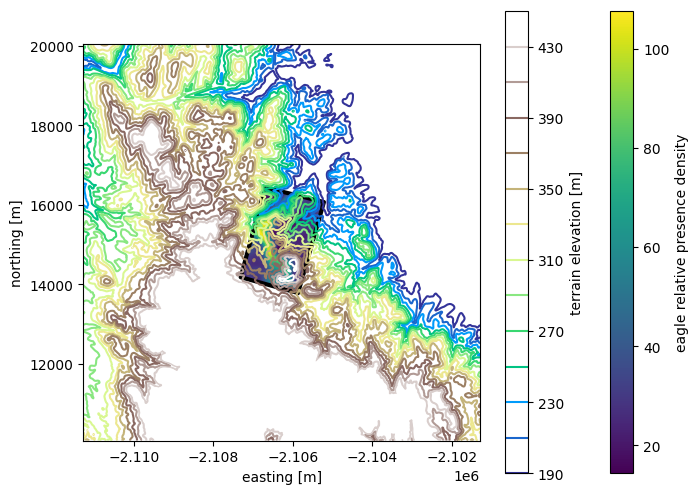

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(xbnd,ybnd,'k',lw=3)

# presence map
cmsh = ax.pcolormesh(gd['xg'],gd['yg'],
                     eagle_presence_in_opt_region)
fig.colorbar(cmsh,label='eagle relative presence density')

# overlay terrain contour lines
terrain_levels = np.arange(190,460,20)
cont = ax.contour(gd['xcc'],gd['ycc'],
                  gd['elev'],
                  terrain_levels,
                  cmap='terrain')
fig.colorbar(cont,label='terrain elevation [m]')

# formatting
ax.set_xlabel('easting [m]')
ax.set_ylabel('northing [m]')
ax.axis('scaled') # do this before setting axes lim

(13780.746876463994, 16437.568000164687)

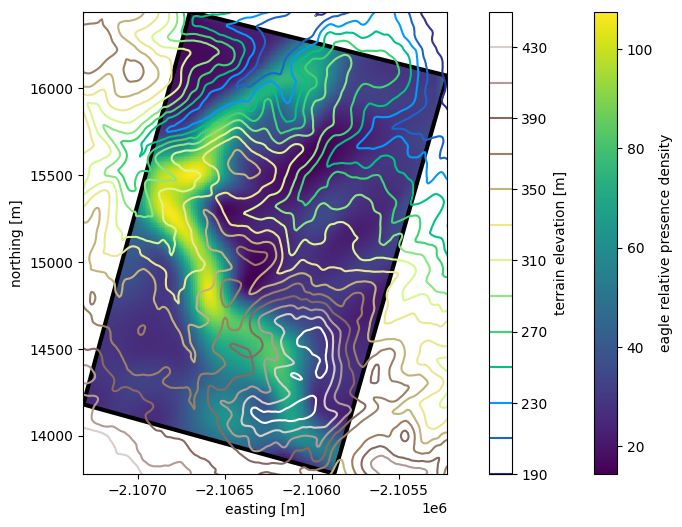

In [6]:
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(xbnd,ybnd,'k',lw=3)

# presence map
cmsh = ax.pcolormesh(gd['xg'],gd['yg'],
                     eagle_presence_in_opt_region)
fig.colorbar(cmsh,label='eagle relative presence density')

# overlay terrain contour lines
terrain_levels = np.arange(190,460,20)
cont = ax.contour(gd['xcc'],gd['ycc'],
                  gd['elev'],
                  terrain_levels,
                  cmap='terrain')
fig.colorbar(cont,label='terrain elevation [m]')

# formatting
ax.set_xlabel('easting [m]')
ax.set_ylabel('northing [m]')
ax.axis('scaled') # do this before setting axes lim
ax.set_xlim((xbnd.min(),xbnd.max()))
ax.set_ylim((ybnd.min(),ybnd.max()))

(13780.746876463994, 16437.568000164687)

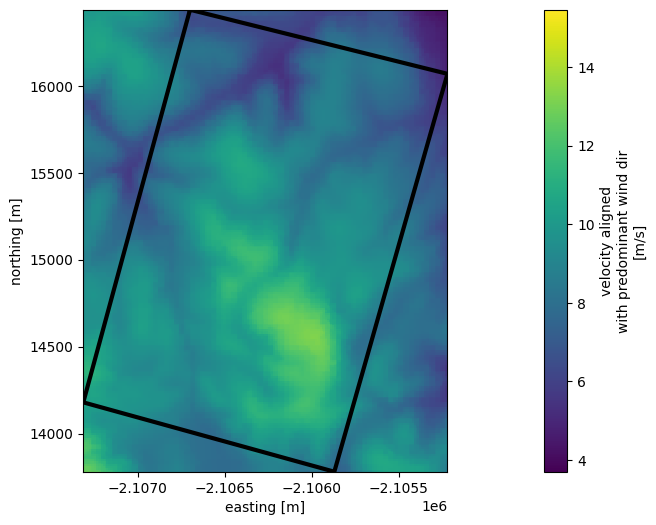

In [7]:
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(xbnd,ybnd,'k',lw=3)

# wind map
cmsh = ax.pcolormesh(gd['xg'],gd['yg'],
                     gd['u_aligned'])
fig.colorbar(cmsh,label='velocity aligned\nwith predominant wind dir\n[m/s]')

# formatting
ax.set_xlabel('easting [m]')
ax.set_ylabel('northing [m]')
ax.axis('scaled') # do this before setting axes lim
ax.set_xlim((xbnd.min(),xbnd.max()))
ax.set_ylim((ybnd.min(),ybnd.max()))